In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
#Loading the datasets

digits = load_digits()
X = digits.data
Y = digits.target

In [5]:
#Standardization of the data is crucial for DBSCAN 

x = StandardScaler().fit_transform(X)

In [6]:
#Since the digits have high dimenstionality , we will use PCA to reduce dimensionality

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca

array([[-1.91421366, -0.95450157],
       [-0.58898033,  0.9246358 ],
       [-1.30203906, -0.31718883],
       ...,
       [-1.02259599, -0.14791087],
       [-1.07605522, -0.38090625],
       [ 1.25770233, -2.22759088]])

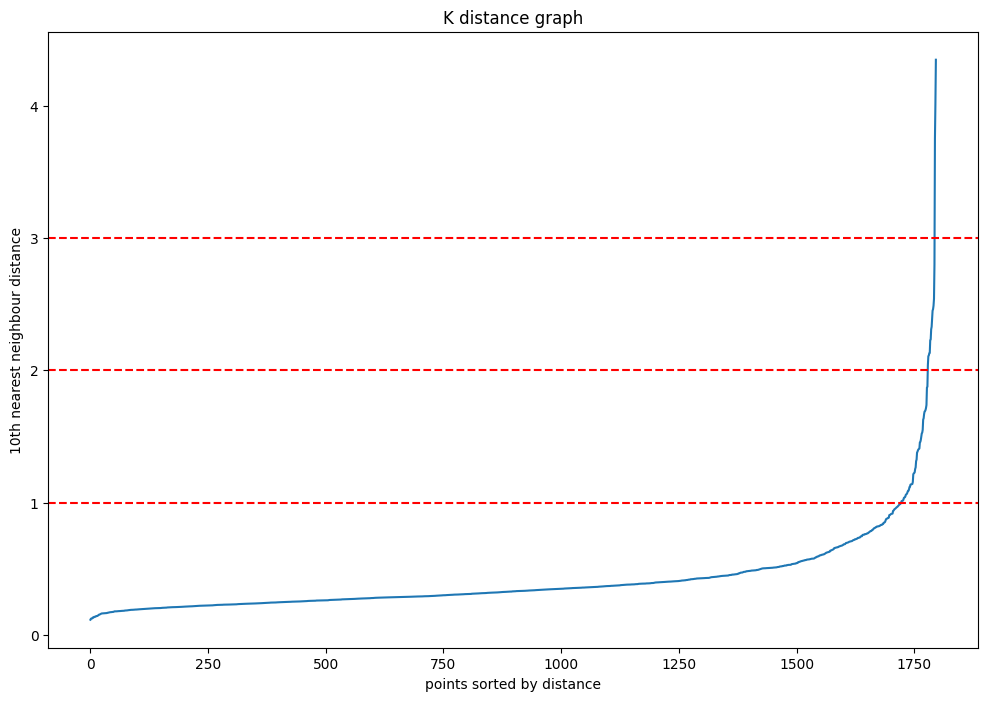

In [7]:
#compute the k nearest neighbours
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
k = 10 
neighbours = NearestNeighbors(n_neighbors=k)
neighbours_fit = neighbours.fit(x_pca)
distances , indixes = neighbours_fit.kneighbors(x_pca)

#sort the distances ( 10th nearest neighbour distance)
distances = np.sort(distances[: , k-1] , axis = 0)

#plot the k distance graph 
plt.figure(figsize=[12,8])
plt.plot(distances)
plt.xlabel('points sorted by distance')
plt.ylabel(f'{k}th nearest neighbour distance')
plt.title('K distance graph')
for y in [1 , 2 , 3]:
    plt.axhline(y=y , color = 'r' , linestyle = '--')
plt.show()

In [8]:
#calculate the second derivative of the distances 
second_derivative = np.diff(distances , n = 2)

#find the index of maximum curvature
elbow_index = np.argmax(second_derivative) + 1

#optimal epsilon value
optimal_epsilon = distances[elbow_index]

print(f'Optimal Epsilon value : {optimal_epsilon}')

Optimal Epsilon value : 2.80070748053865


In [9]:
db = DBSCAN(eps = 1 , min_samples=10).fit(x_pca)
labels = db.labels_

In [11]:
#Number of clusters and noise

n_clusters = len(set(labels)) - (-1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of cluster : {n_clusters}')
print(f'Estimated number of noise_points: {n_noise}')

Estimated number of cluster : 3
Estimated number of noise_points: 34
